In [ ]:
!unzip /content/drive/MyDrive/Copy_of_final_data.zip


Streaming output truncated to the last 5000 lines.
  inflating: final_data/train/real/3000.jpg  
  inflating: final_data/train/real/3001.jpg  
  inflating: final_data/train/real/3002.jpg  
  inflating: final_data/train/real/3003.jpg  
  inflating: final_data/train/real/3004.jpg  
  inflating: final_data/train/real/3005.jpg  
  inflating: final_data/train/real/3006.jpg  
  inflating: final_data/train/real/3007.jpg  
  inflating: final_data/train/real/3008.jpg  
  inflating: final_data/train/real/3009.jpg  
  inflating: final_data/train/real/3010.jpg  
  inflating: final_data/train/real/3011.jpg  
  inflating: final_data/train/real/3012.jpg  
  inflating: final_data/train/real/3013.jpg  
  inflating: final_data/train/real/3014.jpg  
  inflating: final_data/train/real/3015.jpg  
  inflating: final_data/train/real/3016.jpg  
  inflating: final_data/train/real/3017.jpg  
  inflating: final_data/train/real/3018.jpg  
  inflating: final_data/train/real/3019.jpg  
  inflating: final_data/train

In [ ]:

from keras.models import Sequential 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam # - Works

from tensorflow.keras.utils import to_categorical


In [ ]:
# !pip install tensorflow-gpu==2.0.0-alpha
!pip install split-folders


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
# import split-folders
import numpy as np
import cv2
import os


print(os.listdir("/content/final_data"))

['test', 'train']


In [ ]:
real = "/content/final_data/train/real/"
fake = "/content/final_data/train/fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)


In [ ]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]


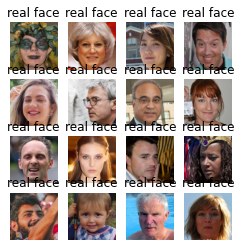

In [ ]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.title("real face")
    plt.axis('off')

plt.show()

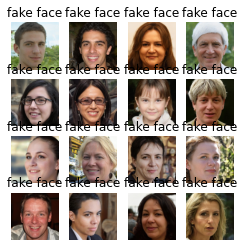

In [ ]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.title("fake face")
    plt.axis('off')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   )


In [ ]:
test_path = "/content/final_data/test"

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(96, 96),
        batch_size=32,
        class_mode='binary')


Found 4000 images belonging to 2 classes.


In [ ]:
dataset_path = "/content/final_data/train"


In [ ]:
train = train_datagen.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32)


Found 16000 images belonging to 2 classes.


In [ ]:
mobilenetV2 = MobileNetV2(input_shape=(96, 96, 3),
                          include_top=False,
                          weights='imagenet'
                          )

average_layer = GlobalAveragePooling2D()

model = Sequential([
    mobilenetV2,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation=tf.nn.softmax)
])


9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [ ]:
model.fit_generator(train,
                    epochs=50,
                    callbacks=[lr_callbacks],
                    validation_data=validation_generator)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/50
500/500 [==============================] - 54s 108ms/step - loss: 0.2126 - accuracy: 0.9139 - val_loss: 10.9595 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
500/500 [==============================] - 53s 105ms/step - loss: 0.1690 - accuracy: 0.9349 - val_loss: 13.1474 - val_accuracy: 0.5058 - lr: 0.0010
Epoch 3/50
500/500 [==============================] - 53s 106ms/step - loss: 0.1391 - accuracy: 0.9454 - val_loss: 7.5843 - val_accuracy: 0.5993 - lr: 0.0010
Epoch 4/50
500/500 [==============================] - 53s 106ms/step - loss: 0.0589 - accuracy: 0.9798 - val_loss: 2.2246 - val_accuracy: 0.7788 - lr: 1.0000e-04
Epoch 5/50
500/500 [==============================] - 53s 105ms/step - loss: 0.0320 - accuracy: 0.9884 - val_loss: 0.5636 - val_accuracy: 0.8842 - lr: 1.0000e-04
Epoch 6/50
500/500 [==============================] - 53s 106ms/step - loss: 0.0227 - accuracy: 0.9919 - val_loss: 0.4187 - val_accuracy: 0.8970 - lr: 1.0000e-04
Epoch 7/50
500/500 [==================

KeyboardInterrupt: ignored